In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/sanyakhan/Desktop/all-deaths_by-county-sex-race_oklahoma_2010-2023.csv')
df

,year,county,sex,race,deaths
0,2010,UNKNOWN,Male,White,0.0
1,2010,UNKNOWN,Male,Black or African American,0.0
2,2010,UNKNOWN,Male,American Indian or Alaska Native,0.0
3,2010,UNKNOWN,Male,Asian,0.0
4,2010,UNKNOWN,Male,Native Hawaiian or Other Pacific Islander,0.0
...,...,...,...,...,...
17467,2023,Woodward,Female,Asian,0.0
17468,2023,Woodward,Female,Native Hawaiian or Other Pacific Islander,0.0
17469,2023,Woodward,Female,Other,0.0
17470,2023,Woodward,Female,Unknown,0.0


In [4]:
df_sex = (
    df.groupby(["year", "sex"])["deaths"]
      .sum()
      .reset_index())
df_sex

,year,sex,deaths
0,2010,Female,1008.0
1,2010,Male,2067.0
2,2011,Female,1083.0
3,2011,Male,2010.0
4,2012,Female,1094.0
5,2012,Male,1999.0
6,2013,Female,1097.0
7,2013,Male,2021.0
8,2014,Female,1105.0
9,2014,Male,1880.0


In [5]:
policy_year = 2022
df_sex["treat"] = (df_sex["sex"] == "Female").astype(int)
df_sex["post"] = (df_sex["year"] >= policy_year).astype(int)
df_sex["treat_post"] = df_sex["treat"] * df_sex["post"]


In [6]:
import statsmodels.formula.api as smf

model = smf.ols(
    "deaths ~ treat + post + treat_post + C(year)",
    data=df_sex
).fit()

print(model.summary())
print("DID estimate:", model.params["treat_post"])

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     48.85
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.03e-08
Time:                        15:32:52   Log-Likelihood:                -159.40
No. Observations:                  28   AIC:                             350.8
Df Residuals:                      12   BIC:                             372.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2036.4583     80.730     

In [ ]:
df = pd.read_csv('/Users/sanyakhan/Library/Mobile Documents/com~apple~Numbers/Documents/ab_access.csv')

In [10]:
df.head()

,origin_fips_code,origin_county_name,origin_state,origin_population,monthlydate,year,month,dest_fips_code,dest_county_name,dest_state,dest_loc_id,dest_loc_name,dest_loc_type,distance_origintodest,distance_type,dest_loc_numfacs,dest_asp
0,1001,Autauga County (AL),AL,11302.0,588,2009,1,1101,Montgomery County (AL),AL,33860,"Montgomery, AL",CBSA,17.593504,Travel (HERE API),2,89495.0
1,1001,Autauga County (AL),AL,11302.0,589,2009,2,1101,Montgomery County (AL),AL,33860,"Montgomery, AL",CBSA,17.593504,Travel (HERE API),2,89495.0
2,1001,Autauga County (AL),AL,11302.0,590,2009,3,1101,Montgomery County (AL),AL,33860,"Montgomery, AL",CBSA,17.593504,Travel (HERE API),2,89495.0
3,1001,Autauga County (AL),AL,11302.0,591,2009,4,1101,Montgomery County (AL),AL,33860,"Montgomery, AL",CBSA,17.593504,Travel (HERE API),2,89495.0
4,1001,Autauga County (AL),AL,11302.0,592,2009,5,1101,Montgomery County (AL),AL,33860,"Montgomery, AL",CBSA,17.593504,Travel (HERE API),2,89495.0


In [ ]:
#cim = df[df["origin_county_name"] == "Oklahoma County (OK)"]
cim = df[
    (df["origin_county_name"] == "Oklahoma County (OK)") &
    (df["year"].between(2021, 2024))
]


cim.sort_values('year')


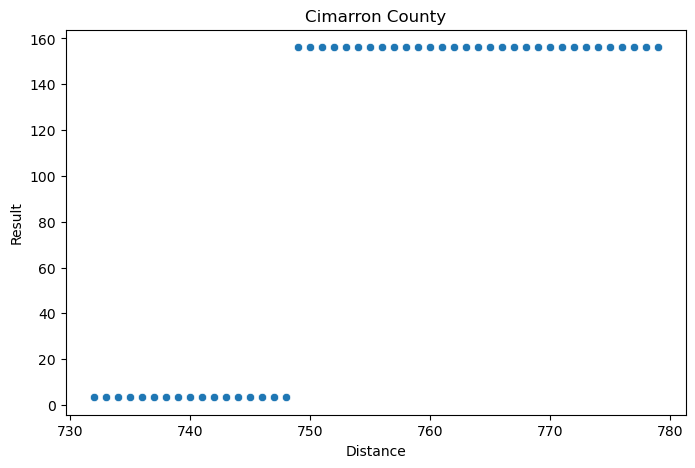

In [36]:
#graph as mongtly date goes up does distance 
#maybe do averages on
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=cim,
    x="monthlydate",
    y="distance_origintodest")

plt.title("Cimarron County")
plt.xlabel("Distance")
plt.ylabel("Result")
plt.show()




In [16]:
cim = df[df["origin_county_name"] == "Fulton County (GA)"]
cim.sort_values('year')

,origin_fips_code,origin_county_name,origin_state,origin_population,monthlydate,year,month,dest_fips_code,dest_county_name,dest_state,dest_loc_id,dest_loc_name,dest_loc_type,distance_origintodest,distance_type,dest_loc_numfacs,dest_asp
89200,13121,Fulton County (GA),GA,214122.0,588,2009,1,13121,Fulton County (GA),GA,12060,"Atlanta-Sandy Springs-Alpharetta, GA",CBSA,3.398279,Travel (HERE API),12,123740.34
89381,13121,Fulton County (GA),GA,214122.0,596,2009,9,13121,Fulton County (GA),GA,12060,"Atlanta-Sandy Springs-Alpharetta, GA",CBSA,3.398279,Travel (HERE API),12,123740.34
89380,13121,Fulton County (GA),GA,214122.0,593,2009,6,13121,Fulton County (GA),GA,12060,"Atlanta-Sandy Springs-Alpharetta, GA",CBSA,3.398279,Travel (HERE API),12,123740.34
89379,13121,Fulton County (GA),GA,214122.0,591,2009,4,13121,Fulton County (GA),GA,12060,"Atlanta-Sandy Springs-Alpharetta, GA",CBSA,3.398279,Travel (HERE API),12,123740.34
89378,13121,Fulton County (GA),GA,214122.0,590,2009,3,13121,Fulton County (GA),GA,12060,"Atlanta-Sandy Springs-Alpharetta, GA",CBSA,3.398279,Travel (HERE API),12,123740.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89373,13121,Fulton County (GA),GA,248259.0,783,2025,4,13121,Fulton County (GA),GA,12060,"Atlanta-Sandy Springs-Alpharetta, GA",CBSA,2.588632,Travel (HERE API),10,260444.41
89374,13121,Fulton County (GA),GA,248259.0,784,2025,5,13121,Fulton County (GA),GA,12060,"Atlanta-Sandy Springs-Alpharetta, GA",CBSA,2.588632,Travel (HERE API),10,260444.41
89375,13121,Fulton County (GA),GA,248259.0,785,2025,6,13121,Fulton County (GA),GA,12060,"Atlanta-Sandy Springs-Alpharetta, GA",CBSA,2.588632,Travel (HERE API),10,260444.41
89377,13121,Fulton County (GA),GA,248259.0,787,2025,8,13121,Fulton County (GA),GA,12060,"Atlanta-Sandy Springs-Alpharetta, GA",CBSA,2.588632,Travel (HERE API),10,260444.41
